In [0]:
import pandas as pd
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/bac

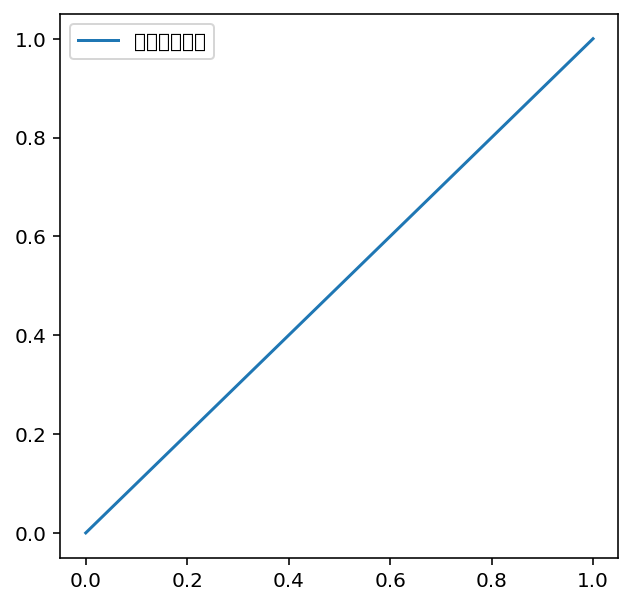

In [0]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [0]:
train = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/train.json', typ = 'frame')
val = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/val.json', typ = 'frame')
test = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/test.json', typ = 'frame')
song_meta = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/song_meta.json', typ = 'frame')
genre_gn_all = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/genre_gn_all.json', typ = 'series')

In [0]:
for data in [train,val,test]:
  data['년도'] = data['updt_date'].apply(lambda x: x[:4])  
  data['월'] = data['updt_date'].apply(lambda x: x[5:7])
  data['시간대'] = data['updt_date'].apply(lambda x:x[11:13])

# 1. 곡 장르 분류 데이터

In [0]:
# 장르코드 : gnr_code, 장르명 : gnr_name
genre_gn_all = pd.DataFrame(genre_gn_all, columns = ['gnr_name']).reset_index().rename(columns = {'index' : 'gnr_code'})

In [0]:
genre_gn_all

,gnr_code,gnr_name
0,GN0100,발라드
1,GN0101,세부장르전체
2,GN0102,'80
3,GN0103,'90
4,GN0104,'00
...,...,...
249,GN2900,뮤지컬
250,GN2901,세부장르전체
251,GN2902,국내뮤지컬
252,GN2903,국외뮤지컬


# 2. 대분류 코드

In [0]:
gnr_code = genre_gn_all[genre_gn_all['gnr_code'].str[-2:]=='00']
gnr_code.T

,0,6,12,18,22,32,39,50,56,65,80,90,100,109,117,128,144,155,163,176,187,198,215,218,225,232,237,242,249,253
gnr_code,GN0100,GN0200,GN0300,GN0400,GN0500,GN0600,GN0700,GN0800,GN0900,GN1000,GN1100,GN1200,GN1300,GN1400,GN1500,GN1600,GN1700,GN1800,GN1900,GN2000,GN2100,GN2200,GN2300,GN2400,GN2500,GN2600,GN2700,GN2800,GN2900,GN3000
gnr_name,발라드,댄스,랩/힙합,R&B/Soul,인디음악,록/메탈,성인가요,포크/블루스,POP,록/메탈,일렉트로니카,랩/힙합,R&B/Soul,포크/블루스/컨트리,OST,클래식,재즈,뉴에이지,J-POP,월드뮤직,CCM,어린이/태교,종교음악,국악,아이돌,일렉트로니카,EDM,뮤직테라피,뮤지컬,크리스마스


In [0]:
gnr_code

,gnr_code,gnr_name
0,GN0100,발라드
6,GN0200,댄스
12,GN0300,랩/힙합
18,GN0400,R&B/Soul
22,GN0500,인디음악
32,GN0600,록/메탈
39,GN0700,성인가요
50,GN0800,포크/블루스
56,GN0900,POP
65,GN1000,록/메탈


In [0]:
gnr_code_large = {code: num for num, code in enumerate(gnr_code['gnr_code'])}
gnr_code_large['GN9000'] = 30

# 3. 상세분류 코드

In [0]:
dtl_gnr_code = genre_gn_all[genre_gn_all['gnr_code'].str[-2:] !='00']
dtl_gnr_code.rename(columns={i:f"dtl_{i}" for i in dtl_gnr_code.columns},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
dtl_gnr_code

,dtl_gnr_code,dtl_gnr_name
1,GN0101,세부장르전체
2,GN0102,'80
3,GN0103,'90
4,GN0104,'00
5,GN0105,'10-
...,...,...
247,GN2805,숙면유도
248,GN2806,반려동물
250,GN2901,세부장르전체
251,GN2902,국내뮤지컬


# 세부 장르 벡터 생성

In [0]:
#1. 곡 별 dtl_grn_code map을 만든다.
song_gnr_map = song_meta.loc[:, ['id', 'song_gn_dtl_gnr_basket']]

# unnest song_gn_gnr_basket
song_gnr_map_unnest = np.dstack(
    (
        #numpy.repeat(a, repeats) : a를 repeats 만큼 반복한다. -> 장르가 여러개 있는 데이터의 경우, id가 반복되서 생성된다.
        np.repeat(song_gnr_map.id.values, list(map(len, song_gnr_map.song_gn_dtl_gnr_basket))), 
        np.concatenate(song_gnr_map.song_gn_dtl_gnr_basket.values)
    )
)

# unnested 데이터프레임 생성 : song_gnr_map
song_gnr_map = pd.DataFrame(data = song_gnr_map_unnest[0], columns = song_gnr_map.columns)
song_gnr_map['id'] = song_gnr_map['id'].astype(str)
song_gnr_map.rename(columns = {'id' : 'song_id', 'song_gn_gnr_basket' : 'gnr_code'}, inplace = True)

# unnest 객체 제거
del song_gnr_map_unnest

dtl_gnr_code_dict = {code: num for num, code in enumerate(dtl_gnr_code['dtl_gnr_code'].values)}
dtl_gnr_code['dtl_gnr_num'] = dtl_gnr_code['dtl_gnr_code'].map(dtl_gnr_code_dict)
song_gnr_map['song_id'] = song_gnr_map['song_id'].astype(int) #type 변경
song_gnr_map['gnr_num'] = song_gnr_map['song_gn_dtl_gnr_basket'].map(dtl_gnr_code_dict) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
song_gnr_map

,song_id,song_gn_dtl_gnr_basket,gnr_num
0,0,GN0901,48
1,1,GN1601,113
2,1,GN1606,118
3,2,GN0901,48
4,3,GN1102,71
...,...,...,...
1512390,707986,GN0101,0
1512391,707987,GN1807,144
1512392,707987,GN1801,138
1512393,707988,GN0601,27


In [0]:
#2. 해당 리스트에 포함한 song_id를 검색한 후, value_count를 수행한다.
def my_fc(data):
    result = {i:0 for i in range(224)}
    try:
        result.update(song_gnr_map.loc[song_gnr_map['song_id'].isin(data), 'gnr_num'].value_counts())
    except:
        pass
    return list(result.values())

g = train['songs'][:10].apply(my_fc)

In [0]:
g

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [11, 0, 1, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2    [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, ...
3    [14, 0, 1, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4    [5, 0, 3, 0, 0, 42, 0, 30, 8, 0, 4, 1, 3, 0, 0...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6    [30, 0, 0, 8, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
7    [12, 0, 1, 7, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0,...
8    [5, 0, 0, 0, 4, 23, 0, 1, 5, 14, 0, 0, 0, 0, 0...
9    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: songs, dtype: object

In [0]:
%%time 
dtl_vector = train['songs'].apply(my_fc)

CPU times: user 1h 25min 1s, sys: 32min 52s, total: 1h 57min 54s
Wall time: 1h 57min 56s


In [0]:
dtl_vector.to_csv('/content/drive/My Drive/Colab Notebooks/data/멜론/dtl_vector.csv', index=False)